In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

In [16]:
credit_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',header=None)

## EDA

In [19]:
credit_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [20]:
credit_raw.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [21]:
credit_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [29]:
print(credit_raw.isna().sum())
print(credit_raw.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [34]:
credit_raw.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
93,b,52.33,1.375,y,p,c,h,9.460,t,f,0,t,g,00200,100,-
65,b,34.17,1.540,u,g,cc,v,1.540,t,t,1,t,g,00520,50000,+
669,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,00120,1,-
623,b,18.83,0.000,u,g,q,v,0.665,f,f,0,f,g,00160,1,-
434,b,58.58,2.710,u,g,c,v,2.415,f,f,0,t,g,00320,0,-
650,b,48.08,3.750,u,g,i,bb,1.000,f,f,0,f,g,00100,2,-
166,b,19.33,9.500,u,g,q,v,1.000,t,f,0,t,g,00060,400,+
162,b,25.08,1.710,u,g,x,v,1.665,t,t,1,t,g,00395,20,+
178,a,18.42,9.250,u,g,q,v,1.210,t,t,4,f,g,00060,540,+


In [41]:
for i in [0,3,4,5,6,8,9,11,12,13,15]:
    print('col=',i,credit_raw[i].unique())

col= 0 ['b' 'a' '?']
col= 3 ['u' 'y' '?' 'l']
col= 4 ['g' 'p' '?' 'gg']
col= 5 ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
col= 6 ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
col= 8 ['t' 'f']
col= 9 ['t' 'f']
col= 11 ['f' 't']
col= 12 ['g' 's' 'p']
col= 13 ['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500' '00168' '00434' '00583' '00030' '00240' '00070' '00455'
 '00311' '00216' '00491' '00400' '00239' '00160' '00711' '00250' '00520'
 '00515' '00420' '?' '00980' '00443' '00140' '00094' '00368' '00288'
 '00928' '00188' '00112' '00171' '00268' '00167' '00075' '00152' '00176'
 '00329' '00212' '00410' '00274' '00375' '00408' '00350' '00204' '00040'
 '00181' '00399' '00440' '00093' '00060' '00395' '00393' '00021' '00029'
 '00102' '00431' '00370' '00024' '00020' '00129' '00510' '00195' '00144'
 '00380' '00049' '00050' '00381' '00150' '00117' '00056' '00211' '002

lets assume that the ? in the above categorical features are missing/unknown

In [44]:
credit_raw[[1,2,7,14]]

,1,2,7,14
0,30.83,0.000,1.250,0
1,58.67,4.460,3.040,560
2,24.50,0.500,1.500,824
3,27.83,1.540,3.750,3
4,20.17,5.625,1.710,0
5,32.08,4.000,2.500,0
6,33.17,1.040,6.500,31285
7,22.92,11.585,0.040,1349
8,54.42,0.500,3.960,314
9,42.50,4.915,3.165,1442


In [59]:
#replace missing/unknown values with None
credit_proc = credit_raw.replace(to_replace='?',value=np.NaN).copy()

In [61]:
credit_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     678 non-null object
1     678 non-null object
2     690 non-null float64
3     684 non-null object
4     684 non-null object
5     681 non-null object
6     681 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    677 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [65]:
#number of entries that have at least 1 NaN value
credit_proc.isna().sum(axis=1).sum()

67

In [67]:
#nearly 10% of the data has missing entries.  
print(67/690*100)

9.710144927536232


In [80]:
credit_proc[i].unique()

array(['b', 'a', nan], dtype=object)

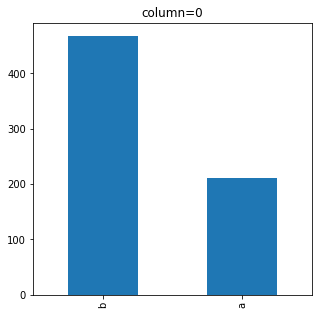

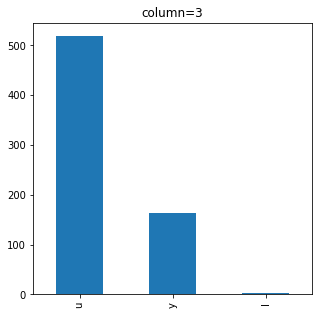

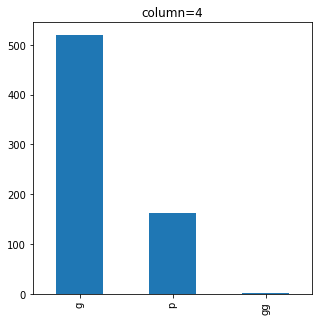

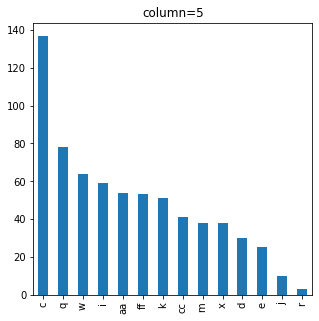

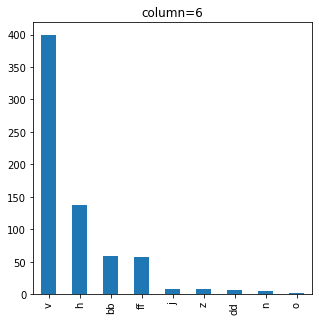

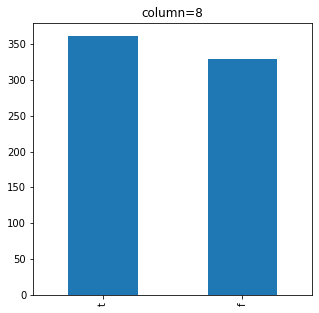

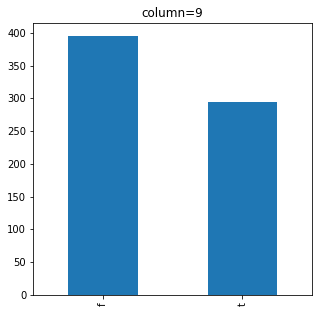

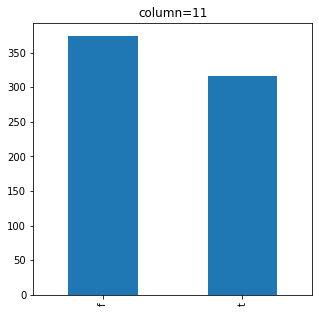

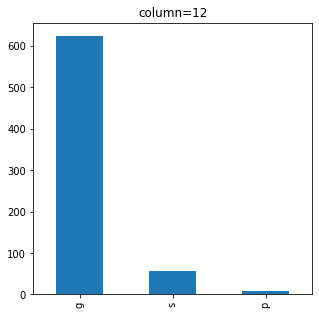

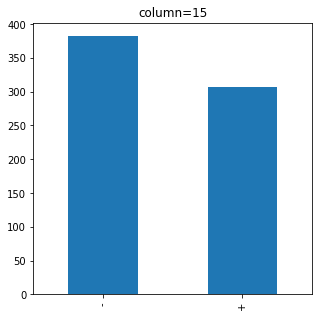

In [95]:
#for each categorical feature, plot distribution
for i in [0,3,4,5,6,8,9,11,12,15]:
    plt.figure(figsize=(5,5))
    plt.title('column='+str(i))
    credit_proc[i].value_counts().plot(kind='bar')

In [102]:
credit_proc[13] = credit_proc[13].apply(float)

## Train-Test-Splitting

In [315]:
X = credit_proc[credit_proc.columns[:-1]]
y = credit_proc[credit_proc.columns[-1]]

In [353]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,stratify=y)

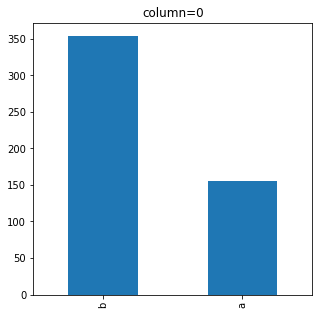

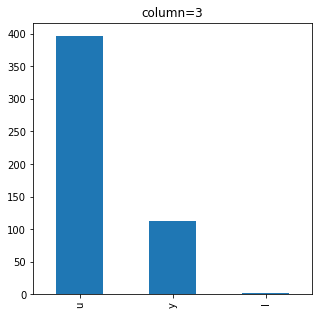

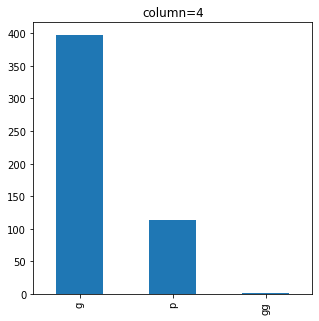

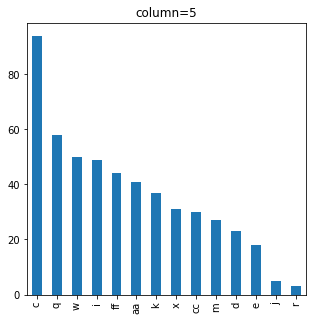

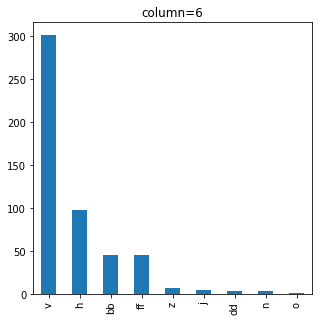

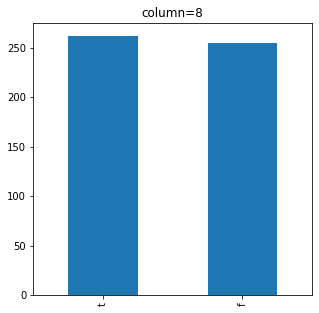

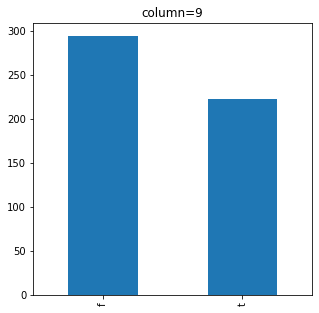

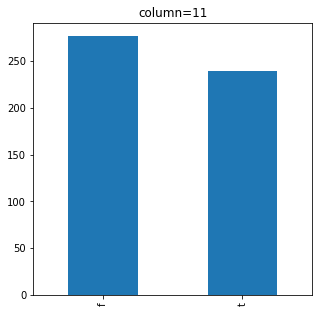

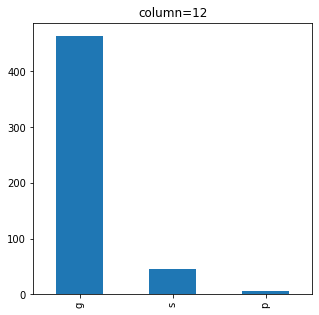

In [105]:
#for each categorical feature, plot distribution
for i in [0,3,4,5,6,8,9,11,12]:
    plt.figure(figsize=(5,5))
    plt.title('column='+str(i))
    X_train[i].value_counts().plot(kind='bar')

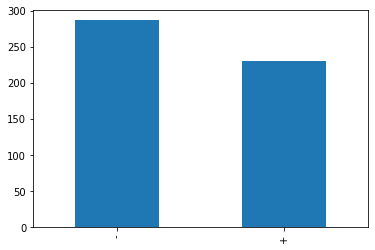

In [106]:
y_train.value_counts().plot(kind='bar')

there is a slight class imbalence, we will have to deal with this later.  Later, we will upsample the positive (+) class

In [317]:
#get most common category for each categorical feature
most_common = []
for i in [0,3,4,5,6,8,9,11,12]:
    most_common.append(X_train[i].value_counts().keys()[0])

In [354]:
X_train = X_train.fillna(X_train.mode().iloc[0])

In [355]:
d = defaultdict(LabelEncoder)
# Encoding the variable
fit = X_train[[0,3,4,5,6,8,9,11,12]].apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))

In [356]:
X_train[[0,3,4,5,6,8,9,11,12]] = fit

In [357]:
ohe = OneHotEncoder(categorical_features=[0,3,4,5,6,8,9,11,12],sparse=False)

In [358]:
X_train = ohe.fit_transform(X_train)

In [359]:
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)

In [360]:
print(len(y_train[y_train==0]),len(y_train[y_train==1]))

230 287


In [361]:
##apply pre-processing pipeline to test set
X_test = X_test.fillna(X_test.mode().iloc[0])
fit_test = X_test[[0,3,4,5,6,8,9,11,12]].apply(lambda x: d[x.name].fit_transform(x))
X_test[[0,3,4,5,6,8,9,11,12]] = fit_test
X_test = ohe.transform(X_test)
y_test = le_y.transform(y_test)

In [362]:
rfc = RandomForestClassifier()

In [363]:
rfc.fit(X_train,y_train)

C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [364]:
rfc.score(X_test,y_test)

0.7861271676300579